In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sb

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/ongxuanhong/Preprocessing-with-horse-colic-dataset/master/horse-colic.csv")

In [6]:
df

,surgery,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,type of lesion 1,type of lesion 2,type of lesion 3,cp_data
0,2,1,530101,38.5,66,28,3,3,?,2,...,45,8.4,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.3,40,24,1,1,3,1,...,33,6.7,?,?,1,2,0,0,0,1
3,1,9,5290409,39.1,164,84,4,1,6,2,...,48,7.2,3,5.3,2,1,2208,0,0,1
4,2,1,530255,37.3,104,35,?,?,6,2,...,74,7.4,?,?,2,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,533886,?,120,70,4,?,4,2,...,55,65,?,?,3,2,3205,0,0,2
296,2,1,527702,37.2,72,24,3,2,4,2,...,44,?,3,3.3,3,1,2208,0,0,1
297,1,1,529386,37.5,72,30,4,3,4,1,...,60,6.8,?,?,2,1,3205,0,0,2
298,1,1,530612,36.5,100,24,3,3,3,1,...,50,6,3,3.4,1,1,2208,0,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   surgery                      300 non-null    object
 1   Age                          300 non-null    int64 
 2   Hospital Number              300 non-null    int64 
 3   rectal temperature           300 non-null    object
 4   pulse                        300 non-null    object
 5   respiratory rate             300 non-null    object
 6   temperature of extremities   300 non-null    object
 7   peripheral pulse             300 non-null    object
 8   mucous membranes             300 non-null    object
 9   capillary refill time        300 non-null    object
 10  pain                         300 non-null    object
 11  peristalsis                  300 non-null    object
 12  abdominal distension         300 non-null    object
 13  nasogastric tube             300 no

In [7]:
df["rectal temperature"].value_counts()

rectal temperature
?       60
38      26
38.5    19
38.3    18
37.8    17
38.2    16
37.5    12
38.6    12
38.1    12
38.4    11
37.2     7
37.7     7
37.9     7
37.6     7
38.7     7
37.3     6
38.8     6
39.2     5
39       4
38.9     4
39.3     4
39.5     4
37.1     3
37.4     3
39.4     3
39.1     2
40.3     2
37       2
36.5     2
40.8     1
36.9     1
36.6     1
36.1     1
35.4     1
36       1
36.8     1
39.6     1
36.4     1
39.7     1
39.9     1
40       1
Name: count, dtype: int64

In [8]:
"""""for coluna in df.columns.values:
     if '?'in df[coluna].astype(str):
         media_coluna = df[coluna].mean()
         pd.to_numeric(df[coluna].replace('?', media_coluna))

SyntaxError: incomplete input (1378781783.py, line 1)

In [8]:
for coluna in df.columns:
    if df[coluna].astype(str).str.contains(r'\?').any():
        media_coluna = pd.to_numeric(df[coluna], errors='coerce').median()
        df[coluna] = df[coluna].replace('?', media_coluna)
        df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   surgery                      300 non-null    float64
 1   Age                          300 non-null    int64  
 2   Hospital Number              300 non-null    int64  
 3   rectal temperature           300 non-null    float64
 4   pulse                        300 non-null    float64
 5   respiratory rate             300 non-null    float64
 6   temperature of extremities   300 non-null    float64
 7   peripheral pulse             300 non-null    float64
 8   mucous membranes             300 non-null    float64
 9   capillary refill time        300 non-null    float64
 10  pain                         300 non-null    float64
 11  peristalsis                  300 non-null    float64
 12  abdominal distension         300 non-null    float64
 13  nasogastric tube    

In [13]:
df['rectal temperature'] = df['rectal temperature'].astype(str).str.replace('38.16791666666667','38.16')

In [14]:
df['rectal temperature'] = df['rectal temperature'].astype(float)

In [33]:
df['abdomcentesis total protein'] = df['abdomcentesis total protein'].astype(str).str.replace('3.019607843137255','3.0')

In [35]:
df['abdomcentesis total protein'] = df['abdomcentesis total protein'].astype(float)

In [28]:
df['total protein']=df['total protein'].astype(str).str.replace('24.45692883895131','24.4')

In [30]:
df['total protein']=df['total protein'].astype(float)

In [20]:
df

,surgery,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,type of lesion 1,type of lesion 2,type of lesion 3,cp_data
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,3.0,2.0,...,45.0,8.4,2.0,2.25,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,3.0,2.0,4.0,1.0,...,50.0,85.0,2.0,2.00,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,2.0,2.25,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.30,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,3.0,2.0,6.0,2.0,...,74.0,7.4,2.0,2.25,2.0,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1,533886,38.2,120.0,70.0,4.0,2.0,4.0,2.0,...,55.0,65.0,2.0,2.25,3.0,2,3205,0,0,2
296,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,...,44.0,7.5,3.0,3.30,3.0,1,2208,0,0,1
297,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,60.0,6.8,2.0,2.25,2.0,1,3205,0,0,2
298,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,50.0,6.0,3.0,3.40,1.0,1,2208,0,0,1


In [10]:
colunas_especiais = ['rectal temperature', 'total protein', 'abdomcentesis total protein']

for coluna in df.columns:
    if df[coluna].dtype == float:
        if coluna in colunas_especiais:
            print(f"Tratamento especial para '{coluna}'")
        else:
            df[coluna] = df[coluna].astype(int)

Tratamento especial para 'rectal temperature'
Tratamento especial para 'total protein'
Tratamento especial para 'abdomcentesis total protein'


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   surgery                      300 non-null    int32  
 1   Age                          300 non-null    int64  
 2   Hospital Number              300 non-null    int64  
 3   rectal temperature           300 non-null    float64
 4   pulse                        300 non-null    int32  
 5   respiratory rate             300 non-null    int32  
 6   temperature of extremities   300 non-null    int32  
 7   peripheral pulse             300 non-null    int32  
 8   mucous membranes             300 non-null    int32  
 9   capillary refill time        300 non-null    int32  
 10  pain                         300 non-null    int32  
 11  peristalsis                  300 non-null    int32  
 12  abdominal distension         300 non-null    int32  
 13  nasogastric tube    

In [17]:
df.to_csv('Colica_equ')

NameError: name 'COLICA_Equinos' is not defined

In [12]:
df2=df.copy()

In [13]:
df2=df2.iloc[:,[0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]

In [14]:
df2.corr()

,surgery,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,...,nasogastric reflux,nasogastric reflux PH,rectal examination,abdomen,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion
surgery,1.000000,-0.088408,0.036004,-0.173301,-0.174031,-0.132398,-0.205932,-0.175727,-0.066995,-0.290174,...,-0.075783,0.077384,-0.200074,-0.307837,-0.037755,-0.037206,-0.139037,-0.014993,-0.115352,0.605829
Age,-0.088408,1.000000,0.178850,0.505530,0.374229,-0.016143,0.022614,-0.000331,-0.041633,0.030829,...,-0.122971,0.016182,-0.050095,-0.005468,-0.141541,-0.106772,-0.054785,-0.033612,-0.003341,-0.043940
rectal temperature,0.036004,0.178850,1.000000,0.197137,0.228467,0.060288,0.073752,0.049927,0.109696,-0.063570,...,-0.001447,0.102796,0.027825,-0.006709,0.058987,-0.051380,-0.058464,-0.002425,-0.047597,0.014817
pulse,-0.173301,0.505530,0.197137,1.000000,0.432002,0.260891,0.431372,0.420023,0.352077,0.249443,...,0.140870,-0.015038,0.202515,0.187978,0.370405,-0.087919,0.244058,0.063667,0.306255,-0.250680
respiratory rate,-0.174031,0.374229,0.228467,0.432002,1.000000,0.080781,0.167903,0.092524,0.068953,0.076419,...,0.052979,0.047869,-0.011530,0.091192,0.066553,-0.088730,0.077773,-0.037536,0.052036,-0.193994
temperature of extremities,-0.132398,-0.016143,0.060288,0.260891,0.080781,1.000000,0.491506,0.327862,0.196648,0.254183,...,0.077292,-0.044978,0.226555,0.197140,0.274697,0.004428,0.302897,0.012000,0.313814,-0.193714
peripheral pulse,-0.205932,0.022614,0.073752,0.431372,0.167903,0.491506,1.000000,0.450946,0.380005,0.300764,...,0.173886,-0.069708,0.302937,0.268004,0.425237,-0.059151,0.304855,0.018589,0.356540,-0.299565
mucous membranes,-0.175727,-0.000331,0.049927,0.420023,0.092524,0.327862,0.450946,1.000000,0.434198,0.360366,...,0.254920,-0.055274,0.246409,0.178729,0.567633,-0.092515,0.269290,-0.008079,0.364047,-0.235796
capillary refill time,-0.066995,-0.041633,0.109696,0.352077,0.068953,0.196648,0.380005,0.434198,1.000000,0.296310,...,0.227615,0.045087,0.256310,0.237378,0.458246,-0.113778,0.250643,0.068197,0.304217,-0.147427
pain,-0.290174,0.030829,-0.063570,0.249443,0.076419,0.254183,0.300764,0.360366,0.296310,1.000000,...,0.138663,-0.031148,0.260531,0.354909,0.180164,-0.122459,0.148033,-0.099707,0.275095,-0.373871


In [15]:
relacao = df[['pain', 'pulse','respiratory rate']].corr()

In [74]:
df2.corr().style.background_gradient(cmap='RdYlGn')


,surgery,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,peristalsis,abdominal distension,nasogastric tube,nasogastric reflux,nasogastric reflux PH,rectal examination,abdomen,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion
surgery,1.000000,-0.088408,0.036004,-0.173301,-0.174031,-0.132398,-0.205932,-0.175727,-0.066995,-0.290174,-0.262196,-0.210467,-0.113815,-0.075783,0.077384,-0.200074,-0.307837,-0.037755,-0.037206,-0.139037,-0.014993,-0.115352,0.605829
Age,-0.088408,1.000000,0.178850,0.505530,0.374229,-0.016143,0.022614,-0.000331,-0.041633,0.030829,-0.031638,0.061165,0.087958,-0.122971,0.016182,-0.050095,-0.005468,-0.141541,-0.106772,-0.054785,-0.033612,-0.003341,-0.043940
rectal temperature,0.036004,0.178850,1.000000,0.197137,0.228467,0.060288,0.073752,0.049927,0.109696,-0.063570,0.038828,0.043724,-0.092508,-0.001447,0.102796,0.027825,-0.006709,0.058987,-0.051380,-0.058464,-0.002425,-0.047597,0.014817
pulse,-0.173301,0.505530,0.197137,1.000000,0.432002,0.260891,0.431372,0.420023,0.352077,0.249443,0.297350,0.358683,0.044171,0.140870,-0.015038,0.202515,0.187978,0.370405,-0.087919,0.244058,0.063667,0.306255,-0.250680
respiratory rate,-0.174031,0.374229,0.228467,0.432002,1.000000,0.080781,0.167903,0.092524,0.068953,0.076419,0.082639,0.103514,-0.039006,0.052979,0.047869,-0.011530,0.091192,0.066553,-0.088730,0.077773,-0.037536,0.052036,-0.193994
temperature of extremities,-0.132398,-0.016143,0.060288,0.260891,0.080781,1.000000,0.491506,0.327862,0.196648,0.254183,0.352681,0.306769,0.029087,0.077292,-0.044978,0.226555,0.197140,0.274697,0.004428,0.302897,0.012000,0.313814,-0.193714
peripheral pulse,-0.205932,0.022614,0.073752,0.431372,0.167903,0.491506,1.000000,0.450946,0.380005,0.300764,0.434829,0.417117,0.086053,0.173886,-0.069708,0.302937,0.268004,0.425237,-0.059151,0.304855,0.018589,0.356540,-0.299565
mucous membranes,-0.175727,-0.000331,0.049927,0.420023,0.092524,0.327862,0.450946,1.000000,0.434198,0.360366,0.391908,0.309454,0.008698,0.254920,-0.055274,0.246409,0.178729,0.567633,-0.092515,0.269290,-0.008079,0.364047,-0.235796
capillary refill time,-0.066995,-0.041633,0.109696,0.352077,0.068953,0.196648,0.380005,0.434198,1.000000,0.296310,0.279171,0.347164,0.096104,0.227615,0.045087,0.256310,0.237378,0.458246,-0.113778,0.250643,0.068197,0.304217,-0.147427
pain,-0.290174,0.030829,-0.063570,0.249443,0.076419,0.254183,0.300764,0.360366,0.296310,1.000000,0.358013,0.376847,0.111039,0.138663,-0.031148,0.260531,0.354909,0.180164,-0.122459,0.148033,-0.099707,0.275095,-0.373871


In [102]:
df2.corr()['abdomen'].abs().to_frame().query('abdomen >= 0.15').index

Index(['surgery', 'pulse', 'temperature of extremities', 'peripheral pulse',
       'mucous membranes', 'capillary refill time', 'pain', 'peristalsis',
       'abdominal distension', 'rectal examination', 'abdomen', 'outcome',
       'surgical lesion'],
      dtype='object')

In [103]:
import statsmodels.api as sm
x=sm.add_constant(df2[['surgery', 'pulse', 'temperature of extremities', 'peripheral pulse',
       'mucous membranes', 'capillary refill time', 'pain', 'peristalsis',
       'abdominal distension', 'rectal examination', 'outcome',
       'surgical lesion']])

In [104]:
resultado = sm.OLS(df2.abdomen, x).fit()

<Axes: >

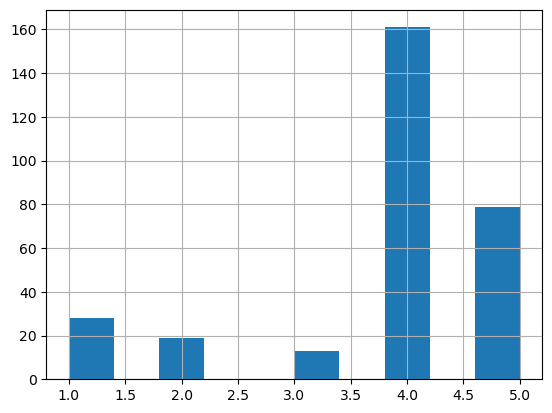

In [105]:
df2.abdomen.hist()

In [106]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                abdomen   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     9.844
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           4.24e-16
Time:                        15:54:59   Log-Likelihood:                -420.66
No. Observations:                 300   AIC:                             867.3
Df Residuals:                     287   BIC:                             915.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

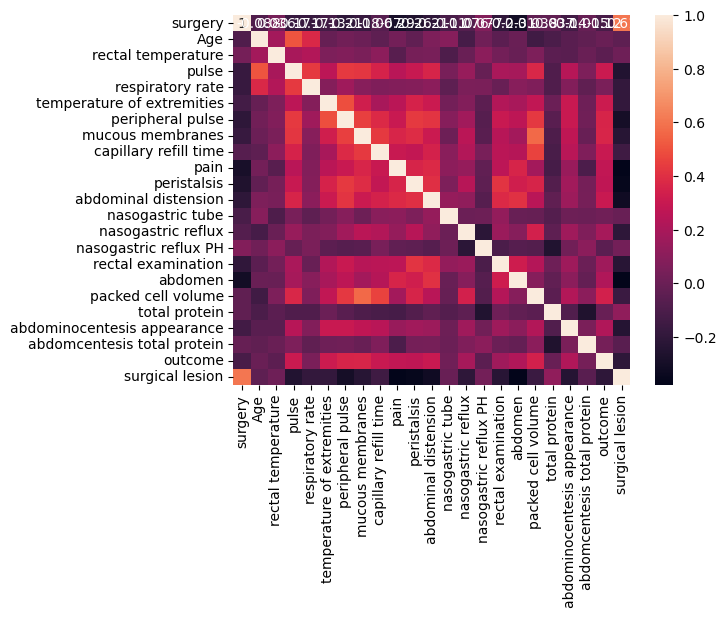

<Figure size 4000x4000 with 0 Axes>

In [62]:
sb.heatmap(df2.corr(),annot=True)
plt.figure(figsize=[40,40],)
plt.show()

In [15]:
relacao

,pain,pulse,respiratory rate
pain,1.000000,0.249443,0.076419
pulse,0.249443,1.000000,0.432002
respiratory rate,0.076419,0.432002,1.000000


In [17]:
RELACAO2 = df[['pain','abdominal distension','surgical lesion']].corr()
RELACAO2

,pain,abdominal distension,surgical lesion
pain,1.000000,0.376847,-0.373871
abdominal distension,0.376847,1.000000,-0.320694
surgical lesion,-0.373871,-0.320694,1.000000


In [18]:
df.pain.value_counts()

pain
3    122
2     59
5     42
4     39
1     38
Name: count, dtype: int64

In [26]:
df.describe()

,surgery,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,type of lesion 1,type of lesion 2,type of lesion 3,cp_data
count,300.000000,300.000000,3.000000e+02,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.396667,1.640000,1.085889e+06,38.134333,71.920000,30.336667,2.283333,2.013333,2.876667,1.273333,...,46.263333,24.406667,2.016667,3.006667,1.553333,1.363333,3657.880000,90.226667,7.363333,1.670000
std,0.490023,2.173972,1.529801e+06,0.658153,27.457482,15.839812,0.951880,0.914299,1.488458,0.461156,...,9.905607,25.914910,0.539158,1.144168,0.736408,0.481763,5399.513513,649.569234,127.536674,0.470998
min,1.000000,1.000000,5.184760e+05,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000,1.000000,...,23.000000,3.300000,1.000000,0.100000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,5.289040e+05,37.900000,48.000000,20.000000,1.000000,1.000000,1.000000,1.000000,...,39.000000,6.600000,2.000000,3.000000,1.000000,1.000000,2111.750000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,5.303055e+05,38.000000,68.000000,30.000000,2.000000,2.000000,3.000000,1.000000,...,46.000000,7.700000,2.000000,3.000000,1.000000,1.000000,2673.500000,0.000000,0.000000,2.000000
75%,2.000000,1.000000,5.347275e+05,38.500000,88.000000,34.250000,3.000000,3.000000,4.000000,2.000000,...,50.000000,53.250000,2.000000,3.000000,2.000000,2.000000,3209.000000,0.000000,0.000000,2.000000
max,2.000000,9.000000,5.305629e+06,40.800000,184.000000,96.000000,4.000000,4.000000,6.000000,3.000000,...,75.000000,89.000000,3.000000,10.100000,3.000000,2.000000,41110.000000,7111.000000,2209.000000,2.000000


In [19]:
df.corr()

,surgery,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,type of lesion 1,type of lesion 2,type of lesion 3,cp_data
surgery,1.000000,-0.088408,-0.124899,0.036004,-0.173301,-0.174031,-0.132398,-0.205932,-0.175727,-0.066995,...,-0.037755,-0.037206,-0.139037,-0.014993,-0.115352,0.605829,-0.163482,-0.098105,-0.046892,0.003913
Age,-0.088408,1.000000,0.697434,0.178850,0.505530,0.374229,-0.016143,0.022614,-0.000331,-0.041633,...,-0.141541,-0.106772,-0.054785,-0.033612,-0.003341,-0.043940,0.022966,0.017915,0.196116,-0.080482
Hospital Number,-0.124899,0.697434,1.000000,0.132014,0.337675,0.248948,-0.026224,0.005913,-0.018987,0.009629,...,-0.088412,-0.216540,-0.107938,-0.044971,-0.003469,-0.101393,0.145486,-0.050253,-0.020875,-0.097457
rectal temperature,0.036004,0.178850,0.132014,1.000000,0.197137,0.228467,0.060288,0.073752,0.049927,0.109696,...,0.058987,-0.051380,-0.058464,-0.002425,-0.047597,0.014817,0.054272,-0.060856,0.028809,-0.057917
pulse,-0.173301,0.505530,0.337675,0.197137,1.000000,0.432002,0.260891,0.431372,0.420023,0.352077,...,0.370405,-0.087919,0.244058,0.063667,0.306255,-0.250680,0.072274,0.001754,0.102473,-0.118413
respiratory rate,-0.174031,0.374229,0.248948,0.228467,0.432002,1.000000,0.080781,0.167903,0.092524,0.068953,...,0.066553,-0.088730,0.077773,-0.037536,0.052036,-0.193994,0.141892,-0.009124,0.147423,0.044926
temperature of extremities,-0.132398,-0.016143,-0.026224,0.060288,0.260891,0.080781,1.000000,0.491506,0.327862,0.196648,...,0.274697,0.004428,0.302897,0.012000,0.313814,-0.193714,-0.026115,-0.030665,0.031462,0.054793
peripheral pulse,-0.205932,0.022614,0.005913,0.073752,0.431372,0.167903,0.491506,1.000000,0.450946,0.380005,...,0.425237,-0.059151,0.304855,0.018589,0.356540,-0.299565,0.097294,0.023376,-0.000845,0.010252
mucous membranes,-0.175727,-0.000331,-0.018987,0.049927,0.420023,0.092524,0.327862,0.450946,1.000000,0.434198,...,0.567633,-0.092515,0.269290,-0.008079,0.364047,-0.235796,-0.073640,-0.025890,0.004800,-0.063020
capillary refill time,-0.066995,-0.041633,0.009629,0.109696,0.352077,0.068953,0.196648,0.380005,0.434198,1.000000,...,0.458246,-0.113778,0.250643,0.068197,0.304217,-0.147427,0.035810,0.002506,-0.034335,-0.045270
